📁 Please upload the 'advertising.csv' file:


Saving advertising.csv to advertising.csv
📄 First 5 rows of the dataset:
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

🔍 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None

📊 Statistical Summary:
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.

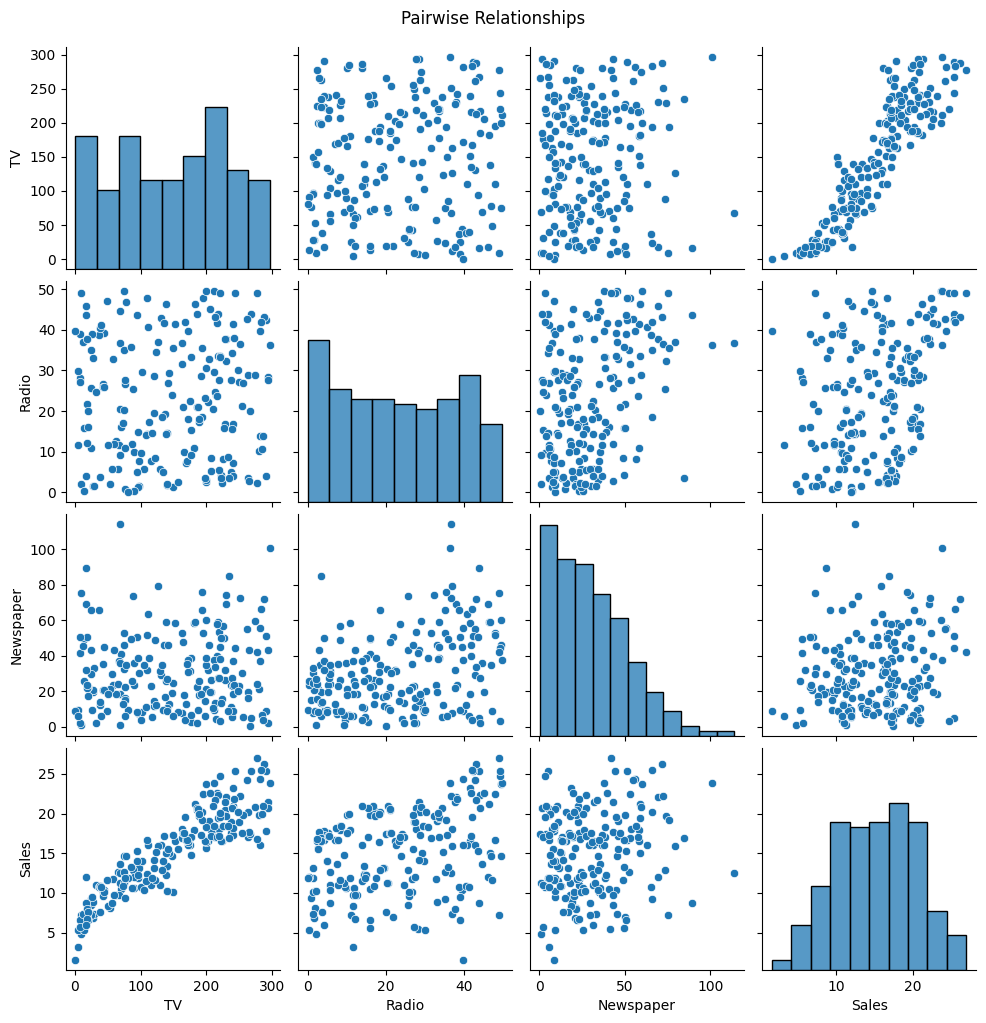

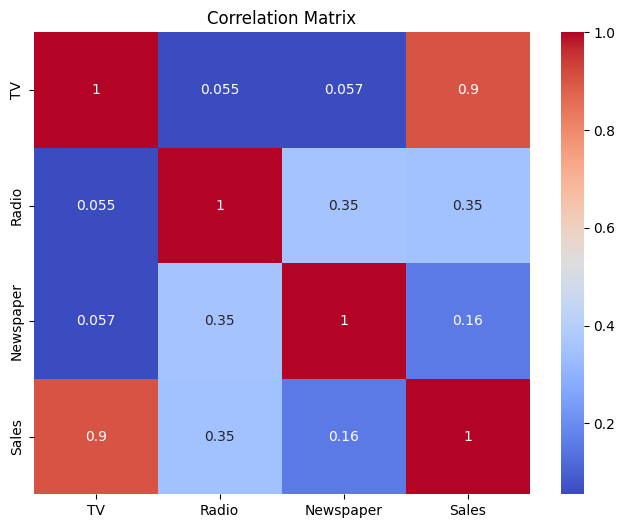


📈 Model Trained.
Intercept: 4.714126402214127
Coefficients: [0.05450927 0.10094536 0.00433665]

📏 Mean Squared Error: 2.91
📊 R-squared Score: 0.91


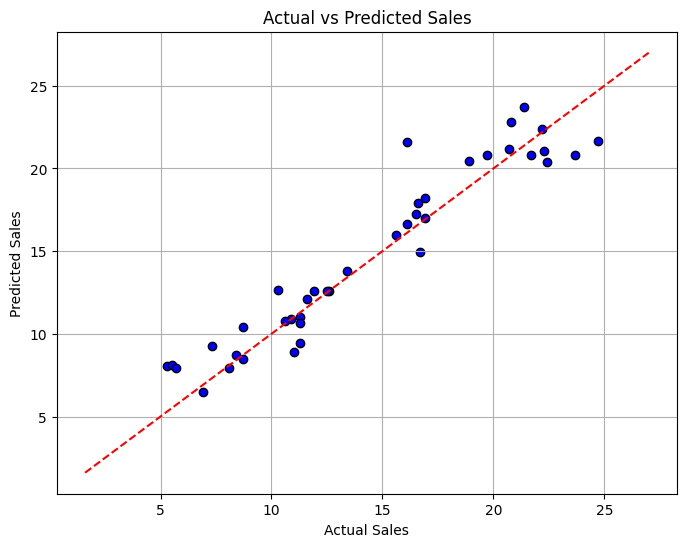

In [1]:
# 📊 Sales Prediction using Machine Learning (Google Colab)

# STEP 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# STEP 2: Upload the Dataset
from google.colab import files
print("📁 Please upload the 'advertising.csv' file:")
uploaded = files.upload()

# Read the CSV file
import io
df = pd.read_csv(io.BytesIO(uploaded['advertising.csv']))

# STEP 3: Explore the Dataset
print("📄 First 5 rows of the dataset:")
print(df.head())

print("\n🔍 Dataset Info:")
print(df.info())

print("\n📊 Statistical Summary:")
print(df.describe())

print("\n🧼 Checking for missing values:")
print(df.isnull().sum())

# STEP 4: Data Visualization
print("\n📉 Pairplot and Correlation Heatmap:")
sns.pairplot(df)
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# STEP 5: Prepare Data for Training
X = df[['TV', 'Radio', 'Newspaper']]  # Independent variables
y = df['Sales']                       # Target variable

# Split the data into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# STEP 6: Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

print("\n📈 Model Trained.")
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# STEP 7: Make Predictions and Evaluate the Model
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n📏 Mean Squared Error: {mse:.2f}")
print(f"📊 R-squared Score: {r2:.2f}")

# STEP 8: Visualize the Predictions
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.grid(True)
plt.show()
